In [1]:
import numpy as np
import os
from PIL import Image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random

## background creation

In [14]:
def file_list(some_dir):
    return [i for i in sorted(os.listdir(some_dir))]    

def got_slice(array, n):
    some_slice = []
    for i in array:
        for num in i:
            some_slice += [num[n]]
    return some_slice


def got_rgb_list(array):
    r =got_slice(array,0)
    g = got_slice(array,1)
    b = got_slice(array,2)            
    df = pd.DataFrame({'r': r,'b': b, 'g': g}, )
    red_list = list(df.r.unique())
    green_list = list(df.g.unique())
    blue_list = list(df.b.unique())    
    
    return red_list, green_list, blue_list

def two_d(size, rgb_list):
    test = []
    for i in range (size):
        test += [[random.choice(rgb_list[0]), random.choice(rgb_list[1]), random.choice(rgb_list[2])]]
    return test

def random_3d(a,b, rgb_list):
    res = []
    for i in range (a):
        res += [two_d(b,rgb_list)]
    res = np.asarray(res)  
    res = np.uint8(res)
    return res

def one_dim(picture, num):
    return got_rgb_list(np.asarray(picture))[num]

def got_unique(some_list):       
    return list(set(some_list))

In [4]:
dir_one = '/home/alex/poker/1/'
dir_two = '/home/alex/poker/2/'
dir_three = '/home/alex/poker/fwd/'
first = file_list(dir_one)
second = file_list(dir_two)
third = file_list(dir_three)

In [5]:
im = Image.open(dir_one+first[0])
first_background = im.crop((110,60,310,210))
first_table = im.crop((310,820,510,970))
img = (Image.open(dir_two+second[2]))
second_table = img.crop((500,1000,700,1200))
second_background = (img).crop((800,400,1000,600))
img = (Image.open(dir_three+third[2]))
third_background = img.crop((800,230,1000,430))
third_table = img.crop((400,635,600,800))

In [15]:
final_rgb = \
[one_dim(first_table,0)+one_dim(second_table,0)+one_dim(third_table,0)
 +one_dim(first_background,0)+one_dim(second_background,0)+one_dim(third_background,0)] +\
[one_dim(first_table,1)+one_dim(second_table,1)+one_dim(third_table,1)
 +one_dim(first_background,1)+one_dim(second_background,1)+one_dim(third_background,1)] +\
[one_dim(first_table,2)+one_dim(second_table,2)+one_dim(third_table,2)
 +one_dim(first_background,2)+one_dim(second_background,2)+one_dim(third_background,2)] 

In [16]:
final_rgb = [got_unique(final_rgb[0]), got_unique(final_rgb[1]), got_unique(final_rgb[2])]

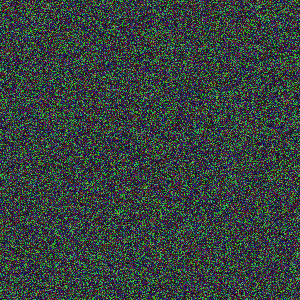

In [53]:
Image.fromarray(random_3d(300,300,final_rgb))

## Random generator

In [55]:
# готовое значение для random figure
print(final_rgb)

[[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 89, 97, 100, 105, 106, 107, 109, 111, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 88, 96, 104, 107, 109, 114, 118, 122, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183], [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66,

In [22]:
def get_coordinate(x1,x2,y1,y2):
    return [[i,j] for i in range(x1,x2) for j in range(y1,y2)]

def delta(first,second):
    return [i for i in first if i not in second]  

def get_center(x2,y2,length):
    return ((x2)-length, (y2)-length)

In [49]:
def random_figures(x ,y, base_size = 20, cicles = 30, max_number_of_element = 8): 
    
    output = {}
    zero_area = random_3d(x,y,final_rgb)
    possible_area = get_coordinate(0,y,0,x)
    possible_color = [0,255]
    res = zero_area    
    counter = 0
    possible_size = [1,2,3,4,5,6,7,8,9,10]
    possible_fill = [1,-1]  
    for i in range(cicles):  
        choice = random.choice(possible_area)
        start_point = (choice[0],choice[1])
        size = base_size+random.choice(possible_size)
        end_point = (choice[0]+size, choice[1]+size)
        range_between = 6
        center = (get_center(end_point[0],end_point[1],size//2))
        rect_area = get_coordinate(start_point[0]-range_between,end_point[0]+range_between,
                                   start_point[1]-range_between,end_point[1]+range_between)
        figure_type = [1,0]
        this_delta = delta(rect_area, possible_area)   
        
        if len(this_delta) == 0:    
            counter += 1
            color = (random.choice(possible_color), random.choice(possible_color), random.choice(possible_color)) 
            thickness = random.choice(possible_fill)
            # print (end_point,center)
            radius = size//2        
            if random.choice(figure_type) == 0:
                res = cv2.rectangle(res, start_point, end_point, color, thickness)  
                output[counter] = {'figure':'rectangle', 'start_point':start_point,
                                  'end_point':end_point, 'color':color}
            else:
                res = cv2.circle(res, center, radius, color, thickness)  
                output[counter] = {'figure':'circle', 'center':center,
                                  'radius':radius, 'color':color}
                
            possible_area = delta(possible_area,rect_area)               
            if counter == max_number_of_element:
                break
            else:
                continue        
        else:
            continue
    return Image.fromarray(res), output 

In [50]:
sample = random_figures(100,200)

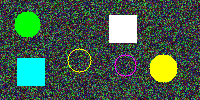

In [51]:
sample[0]

In [52]:
sample[1]

{1: {'figure': 'circle',
  'center': (79, 60),
  'radius': 12,
  'color': (255, 255, 0)},
 2: {'figure': 'rectangle',
  'start_point': (109, 15),
  'end_point': (136, 42),
  'color': (255, 255, 255)},
 3: {'figure': 'rectangle',
  'start_point': (17, 58),
  'end_point': (44, 85),
  'color': (0, 255, 255)},
 4: {'figure': 'circle',
  'center': (163, 68),
  'radius': 14,
  'color': (255, 255, 0)},
 5: {'figure': 'circle',
  'center': (27, 24),
  'radius': 13,
  'color': (0, 255, 0)},
 6: {'figure': 'circle',
  'center': (125, 65),
  'radius': 11,
  'color': (255, 0, 255)}}